In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
classic_QRA = pd.read_parquet("sim_results_grid_classic_QRA.parquet")  # auto-detects engine if pyarrow/fastparquet installed
classic_QRA.head()

,index,X,Y,integral,probit,probability,sector,code,speed_class,day_part,A0_case,stability,v_sim,cell_weight
0,0,-1000.0,-1000.000000,2.852331e-42,-81.145328,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204
1,1,-1000.0,-989.949749,2.994486e-42,-81.108851,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204
2,2,-1000.0,-979.899497,3.142630e-42,-81.072635,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204
3,3,-1000.0,-969.849246,3.296944e-42,-81.036683,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204
4,4,-1000.0,-959.798995,3.457611e-42,-81.000997,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204


In [3]:
classic_QRA = pd.read_parquet("sim_results_grid_classic_QRA.parquet")  # auto-detects engine if pyarrow/fastparquet installed
classic_QRA.head()

,index,X,Y,integral,probit,probability,sector,code,speed_class,day_part,A0_case,stability,v_sim,cell_weight
0,0,-1000.0,-1000.000000,2.852331e-42,-81.145328,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204
1,1,-1000.0,-989.949749,2.994486e-42,-81.108851,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204
2,2,-1000.0,-979.899497,3.142630e-42,-81.072635,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204
3,3,-1000.0,-969.849246,3.296944e-42,-81.036683,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204
4,4,-1000.0,-959.798995,3.457611e-42,-81.000997,0.0,0.0,2B,≤3 m/s (låg),Dag,A0_min,B,2.0,0.003204


In [4]:

# -------------------- 1.  Gather the files --------------------
files = [
    "mc_malmo_apr_aug_2024.parquet",
    "mc_malmo_feb_2024.parquet",
    "mc_malmo_jan_2024.parquet",
    "mc_malmo_mar_2024.parquet",
    "mc_malmo_sep_dec_2024.parquet",
]

# -------------------- 2.  Read & combine ----------------------
montecarlo_QRA = pd.concat(
    [pd.read_parquet(Path(f)) for f in files],
    ignore_index=True      # keeps a clean row index
)


In [5]:
montecarlo_QRA.head()


,index,X,Y,integral,probit,probability,weather_time,sample
0,0,-1000.0,-1000.000000,0.0,-inf,0.0,2024-04-01,0
1,1,-1000.0,-989.949749,0.0,-inf,0.0,2024-04-01,0
2,2,-1000.0,-979.899497,0.0,-inf,0.0,2024-04-01,0
3,3,-1000.0,-969.849246,0.0,-inf,0.0,2024-04-01,0
4,4,-1000.0,-959.798995,0.0,-inf,0.0,2024-04-01,0


In [6]:

# 2️⃣  One‑liner boolean check (True means you’re good)
montecarlo_QRA['weather_time'].nunique()

8784

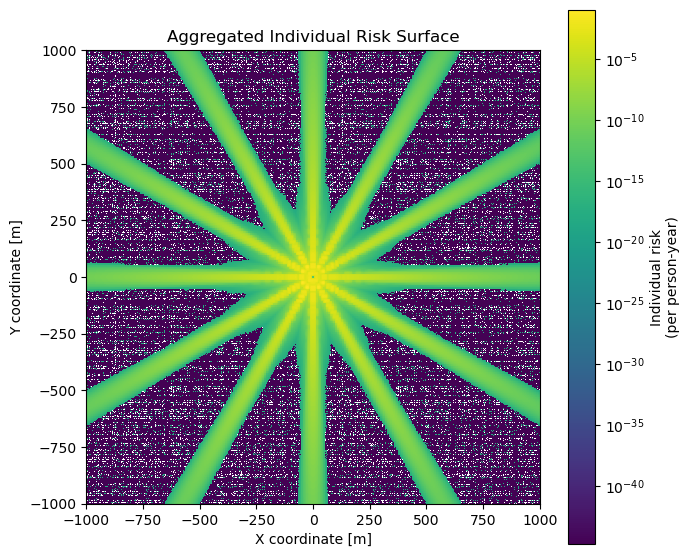

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm   # for logarithmic colour scale

# ------------------------------------------------------------------
# 0.  INPUTS
# ------------------------------------------------------------------
df = classic_QRA            # or montecarlo_QRA, or any similar dataframe
base_frequency = 1          # [events per year] – tweak as required

# ------------------------------------------------------------------
# 1.  RISK CALCULATION
# ------------------------------------------------------------------
# probability  = P(death | that scenario occurs)
# cell_weight  = scenario likelihood “weight” (often duration or # runs)
# base_freq    = how often the base scenario itself occurs per year
df["risk"] = df["probability"] * df["cell_weight"] * base_frequency

# Aggregate → total individual risk at each (X, Y) location
risk_map = (
    df.groupby(["X", "Y"], as_index=False)["risk"]
      .sum()
)

# ------------------------------------------------------------------
# 2.  PREP FOR PLOTTING
# ------------------------------------------------------------------
# If your grid is regular, pivot to a 2‑D array so imshow/pcolormesh
# draws a nice heat‑map.  Otherwise skip the pivot and use scatter.
grid = risk_map.pivot_table(index="Y", columns="X", values="risk")


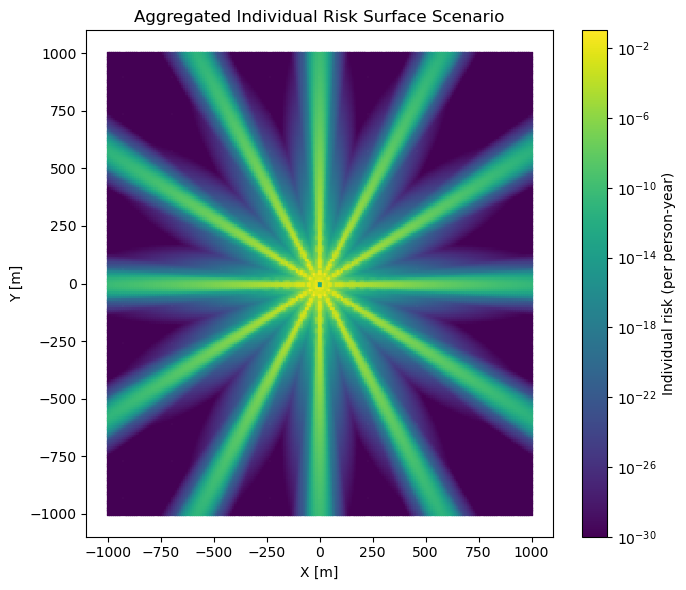

In [26]:
plt.figure(figsize=(7, 6))
plt.scatter(
    risk_map["X"], risk_map["Y"],
    c=risk_map["risk"],
    norm=LogNorm(vmin=1e-30, vmax=risk_map["risk"].max()),
    s=2, marker="s", rasterized=True
)
plt.colorbar(label="Individual risk (per person‑year)")
plt.xlabel("X [m]"); plt.ylabel("Y [m]")
plt.title("Aggregated Individual Risk Surface Scenario")
plt.tight_layout(); plt.show()



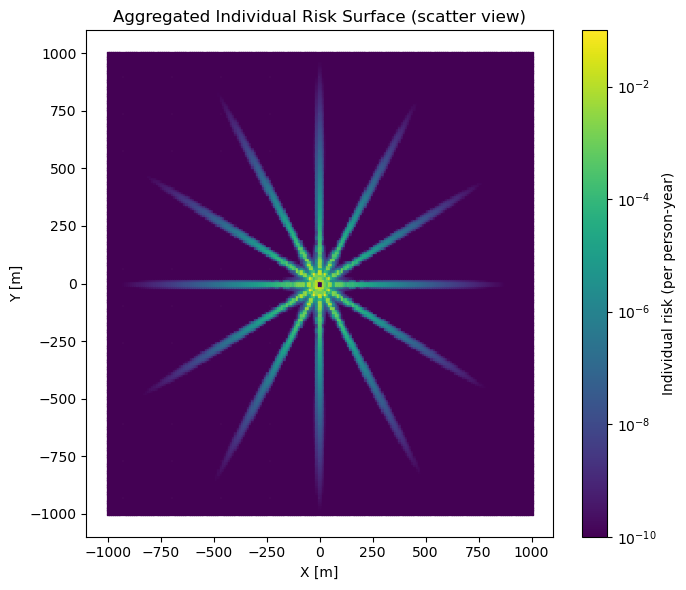

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(
    risk_map["X"], risk_map["Y"],
    c=risk_map["risk"],
    norm=LogNorm(vmin=1e-10, vmax=1e-1),
    s=2, marker="s", rasterized=True
)
plt.colorbar(label="Individual risk (per person‑year)")
plt.xlabel("X [m]"); plt.ylabel("Y [m]")
plt.title("Aggregated Individual Risk Surface Scenario")
plt.tight_layout(); plt.show()

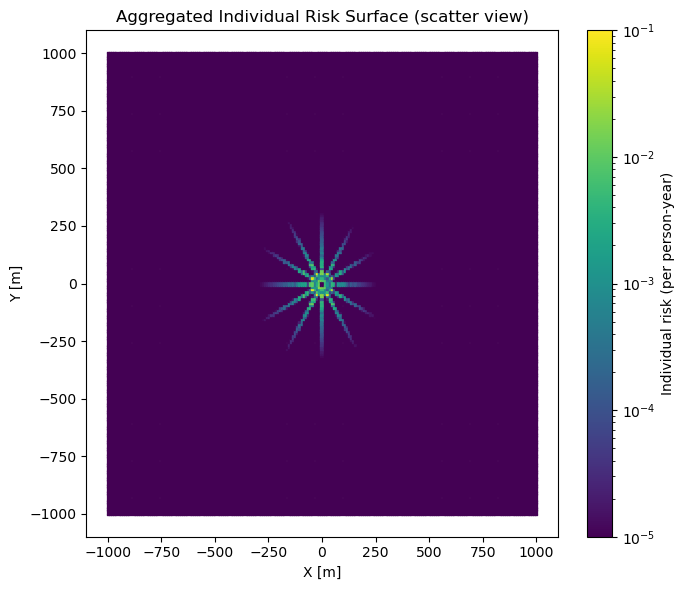

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(
    risk_map["X"], risk_map["Y"],
    c=risk_map["risk"],
    norm=LogNorm(vmin=1e-5, vmax=1e-1),
    s=2, marker="s", rasterized=True
)
plt.colorbar(label="Individual risk (per person‑year)")
plt.xlabel("X [m]"); plt.ylabel("Y [m]")
plt.title("Aggregated Individual Risk Surface Scenario")
plt.tight_layout(); plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# ------------------------------------------------------------------
# 0.  INPUTS
# ------------------------------------------------------------------
df2 = montecarlo_QRA.copy()      # your hourly MC dataframe
base_frequency = 1              # events per year – change freely


In [10]:
# Make sure weather_time is proper datetime
df2["weather_time"] = pd.to_datetime(df2["weather_time"])

# ------------------------------------------------------------------
# 1.  COLLAPSE MC REPLICATES → ONE MEAN PER HOUR
# ------------------------------------------------------------------
hourly_mean2 = (
    df2.groupby(["weather_time", "X", "Y"], as_index=False)["probability"]
      .mean()                          # average over 'sample' column
)

# ------------------------------------------------------------------
# 2.  WEIGHT HOURS TO GET ANNUAL EXPECTATION
# ------------------------------------------------------------------
n_hours = hourly_mean2["weather_time"].nunique()   # should be 8 784 for a leap year
hourly_mean2["risk"] = hourly_mean2["probability"] * base_frequency / n_hours

# ------------------------------------------------------------------
# 3.  SUM OVER ALL HOURS → TOTAL INDIVIDUAL RISK PER (X,Y)
# ------------------------------------------------------------------
risk_map2 = (
    hourly_mean2.groupby(["X", "Y"], as_index=False)["risk"]
      .sum()
)

# ------------------------------------------------------------------
# 4.  PIVOT TO 2‑D GRID FOR A HEAT‑MAP
#     (Skip this pivot and use scatter if your grid is irregular.)
# ------------------------------------------------------------------
grid2 = risk_map2.pivot_table(index="Y", columns="X", values="risk")


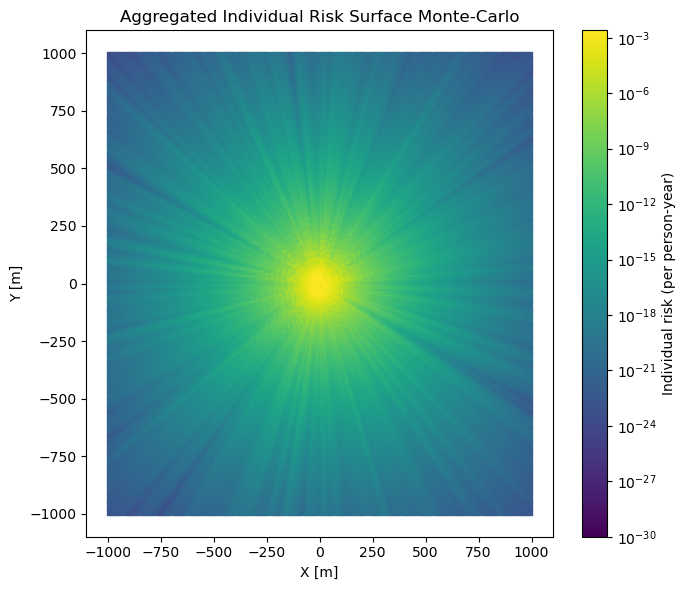

In [25]:
plt.figure(figsize=(7, 6))
plt.scatter(
    risk_map2["X"], risk_map2["Y"],
    c=risk_map2["risk"],
    norm=LogNorm(vmin=1e-30, vmax=risk_map2["risk"].max()),
    s=2, marker="s", rasterized=True
)
plt.colorbar(label="Individual risk (per person‑year)")
plt.xlabel("X [m]"); plt.ylabel("Y [m]")
plt.title("Aggregated Individual Risk Surface Monte-Carlo")
plt.tight_layout(); plt.show()


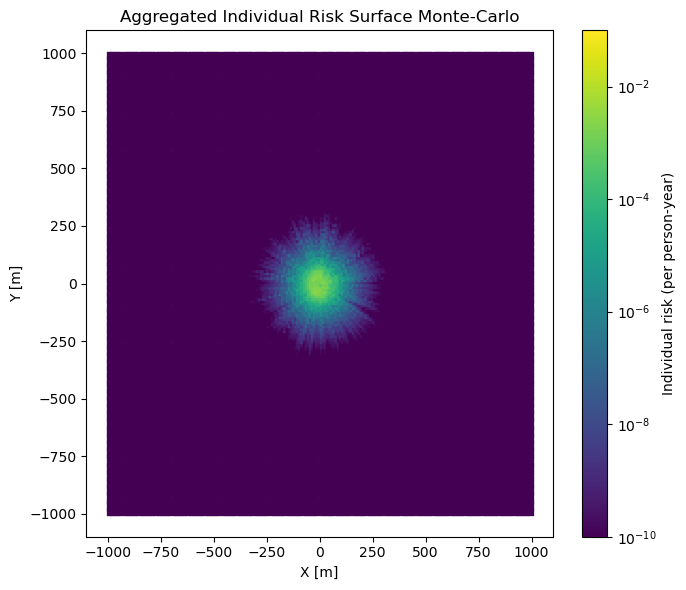

In [24]:
plt.figure(figsize=(7, 6))
plt.scatter(
    risk_map2["X"], risk_map2["Y"],
    c=risk_map2["risk"],
    norm=LogNorm(vmin=1e-10, vmax=1e-1),
    s=2, marker="s", rasterized=True
)
plt.colorbar(label="Individual risk (per person‑year)")
plt.xlabel("X [m]"); plt.ylabel("Y [m]")
plt.title("Aggregated Individual Risk Surface Monte-Carlo")
plt.tight_layout(); plt.show()

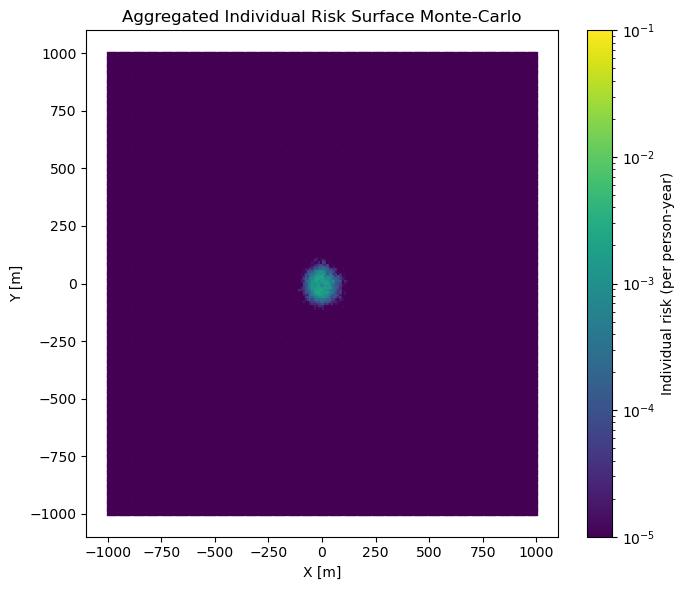

In [23]:
plt.figure(figsize=(7, 6))
plt.scatter(
    risk_map2["X"], risk_map2["Y"],
    c=risk_map2["risk"],
    norm=LogNorm(vmin=1e-5, vmax=1e-1),
    s=2, marker="s", rasterized=True
)
plt.colorbar(label="Individual risk (per person‑year)")
plt.xlabel("X [m]"); plt.ylabel("Y [m]")
plt.title("Aggregated Individual Risk Surface Monte-Carlo")
plt.tight_layout(); plt.show()


Merged IR maps (first 8 rows):
      X            Y      risk_mc  risk_scenario    delta_abs    delta_rel
-1000.0 -1000.000000 1.610753e-23   4.844887e-45 1.610753e-23 3.324645e+21
-1000.0  -989.949749 1.800700e-23   9.264692e-45 1.800700e-23 1.943616e+21
-1000.0  -979.899497 2.228037e-23   3.179547e-44 2.228037e-23 7.007405e+20
-1000.0  -969.849246 2.846875e-23   1.188569e-43 2.846875e-23 2.395212e+20
-1000.0  -959.798995 3.401475e-23   4.396626e-43 3.401475e-23 7.736557e+19
-1000.0  -949.748744 3.614494e-23   1.591211e-42 3.614494e-23 2.271537e+19
-1000.0  -939.698492 3.504257e-23   5.626180e-42 3.504257e-23 6.228484e+18
-1000.0  -929.648241 3.574984e-23   1.942655e-41 3.574984e-23 1.840257e+18


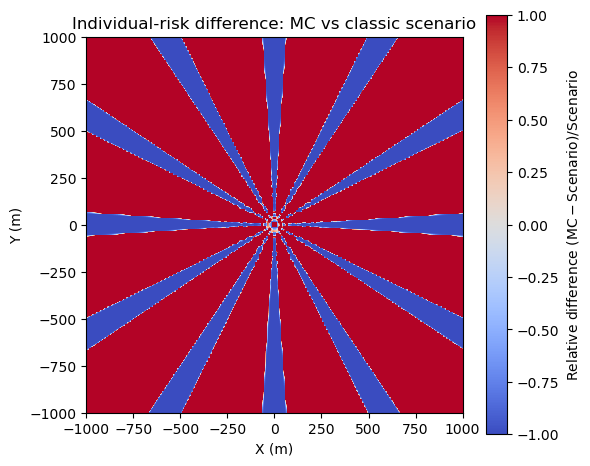

In [27]:
# ------------------------------------------------------------
# 2. Merge on X & Y
combo = (
    risk_map2.rename(columns={"risk": "risk_mc"})
    .merge(risk_map.rename(columns={"risk": "risk_scenario"}),
           on=["X", "Y"], how="inner")
)

# 3. Absolute and relative differences
combo["delta_abs"] = combo["risk_mc"] - combo["risk_scenario"]
combo["delta_rel"] = combo["delta_abs"] / combo["risk_scenario"].replace(0, np.nan)

# ------------------------------------------------------------
# 4. Preview
print("\nMerged IR maps (first 8 rows):")
print(combo.head(8).to_string(index=False))

# ------------------------------------------------------------
# 5. Relative‑difference heat map  (±100 % scale)
pivot = combo.pivot(index="Y", columns="X", values="delta_rel")
extent = [pivot.columns.min(), pivot.columns.max(),
          pivot.index.min(), pivot.index.max()]

plt.figure(figsize=(6,5))
plt.imshow(pivot.values, extent=extent, origin='lower',
           cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label=r"Relative difference $(\mathrm{MC}-\mathrm{Scenario})/\mathrm{Scenario}$")
plt.title("Individual‑risk difference: MC vs classic scenario")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.tight_layout()

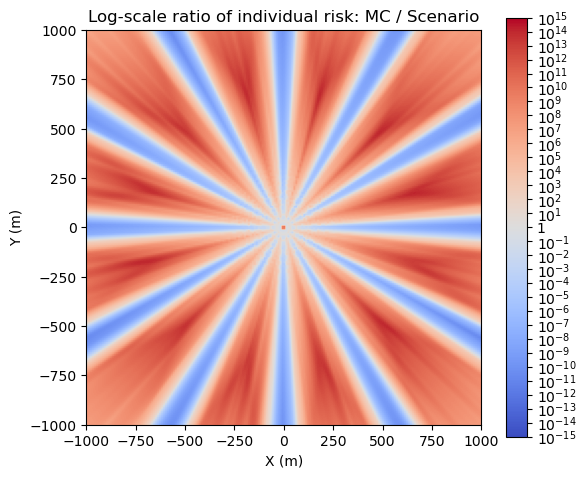

In [34]:
# Compute ratio and log10 ratio (avoid /0 by eps)
import matplotlib.colors as mcolors
eps = 1e-30
ratio = (combo["risk_mc"] + eps) / (combo["risk_scenario"] + eps)
log_ratio = np.log10(ratio)

combo["log10_ratio"] = log_ratio

# Pivot for imshow
pivot_log = combo.pivot(index="Y", columns="X", values="log10_ratio")
extent = [pivot_log.columns.min(), pivot_log.columns.max(),
          pivot_log.index.min(), pivot_log.index.max()]

# Choose symmetric limits e.g. ±3 decades (factor 1000)
vmax = np.nanmax(np.abs(pivot_log.values))
vmax = max(1, np.ceil(vmax))  # at least 1 decade
vmax = min(vmax, 100)           # cap at ±3 for readability
vmin = -vmax

plt.figure(figsize=(6,5))
cmap = plt.get_cmap('coolwarm')
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
im = plt.imshow(pivot_log.values, extent=extent, origin='lower',
                cmap=cmap, norm=norm)
cbar = plt.colorbar(im, label=r"")

# Tick labels in factor form on colour bar
tick_vals = np.arange(vmin, vmax+1)
cbar.set_ticks(tick_vals)
cbar.set_ticklabels([f"$10^{{{int(t)}}}$" if t!=0 else "1" for t in tick_vals])

plt.title("Log‑scale ratio of individual risk: MC / Scenario")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.tight_layout()